**Tuning the kernels and hyperparameters of Gaussian Processes**

*Akhlak Mahmood, Yingling Group, MSE, NCSU*

Email: amahmoo3@ncsu.edu

In [1]:
import numpy as np
import sklearn.gaussian_process.kernels as k

In [2]:
import matplotlib
import matplotlib.pyplot as plt

plt.rc('axes', grid=True)
plt.rc('grid', linestyle="--", color='#ddd')
plt.rc("font", size=8)
plt.rc("axes", labelsize=10)
plt.rc("figure", dpi=150)
plt.rc("figure", figsize=(3.25, 2.6))
colors = plt.cm.Spectral(np.linspace(0,1,12), True)
plt.rc("axes", prop_cycle=matplotlib.cycler(color=colors))
plt.rc("pcolor", shading="auto")

In [3]:
rbf = k.RBF(length_scale=1)
rbf

RBF(length_scale=1)

# Sampling of the functions under a gp prior

### We first need the design matrix

In [201]:
n = 20

In [202]:
X = np.linspace(0, 10, n)
# convert into a column
X = X.reshape(-1, 1)

In [185]:
from scipy.spatial import distance

In [186]:
# pairwise distances
D = distance.cdist(X, X, metric="sqeuclidean")
D.shape

(100, 100)

In [187]:
eps = np.finfo(float).eps

In [188]:
# Covariance matrix
Sigma = np.exp(-D * 0.5) + eps * np.identity(n)
Sigma

array([[1.00000000e+00, 9.94911470e-01, 9.79800714e-01, ...,
        1.42487329e-21, 5.26916305e-22, 1.92874985e-22],
       [9.94911470e-01, 1.00000000e+00, 9.94911470e-01, ...,
        3.81399159e-21, 1.42487329e-21, 5.26916305e-22],
       [9.79800714e-01, 9.94911470e-01, 1.00000000e+00, ...,
        1.01053670e-20, 3.81399159e-21, 1.42487329e-21],
       ...,
       [1.42487329e-21, 3.81399159e-21, 1.01053670e-20, ...,
        1.00000000e+00, 9.94911470e-01, 9.79800714e-01],
       [5.26916305e-22, 1.42487329e-21, 3.81399159e-21, ...,
        9.94911470e-01, 1.00000000e+00, 9.94911470e-01],
       [1.92874985e-22, 5.26916305e-22, 1.42487329e-21, ...,
        9.79800714e-01, 9.94911470e-01, 1.00000000e+00]])

In [189]:
# rbf and manually created sigma is same
rbf = k.RBF(length_scale=1.0)
rbf(X) - Sigma

array([[-2.22044605e-16,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -2.22044605e-16,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.22044605e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.22044605e-16,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -2.22044605e-16,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -2.22044605e-16]])

In [190]:
gen = np.random.default_rng(seed=42)

In [191]:
Y = gen.multivariate_normal([0] * n, Sigma, size=10)

In [192]:
Y.shape

(10, 100)

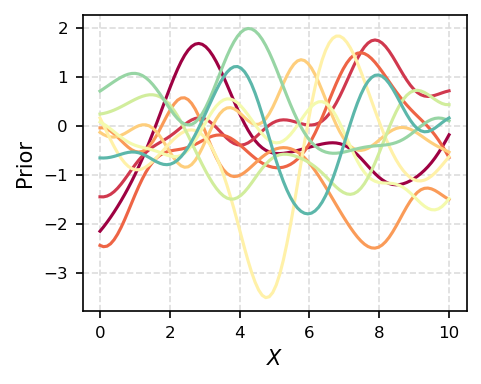

In [193]:
for y in Y:
    plt.plot(X, y, '-')
plt.xlabel("$X$")
plt.ylabel("Prior")
plt.tight_layout()
plt.show()

### Note! The rbf function does not work, and no errors are thrown when the input X is not converted into a column vector

In [194]:
rbf(np.linspace(0, 10, n))

array([[1.]])

In [195]:
def plot_prior(sigma, size=10):
    Y = gen.multivariate_normal([0] * n, sigma, size=size)
    for y in Y:
        plt.plot(X, y, 'o')
        plt.plot(X, y, '-')
    plt.xlabel("$X$")
    plt.ylabel("$%d$ prior realizations" %size)
    plt.tight_layout()
    plt.show()
    print("Mean = %0.3f, Std = %0.3f" %(np.mean(Y), np.std(Y)))

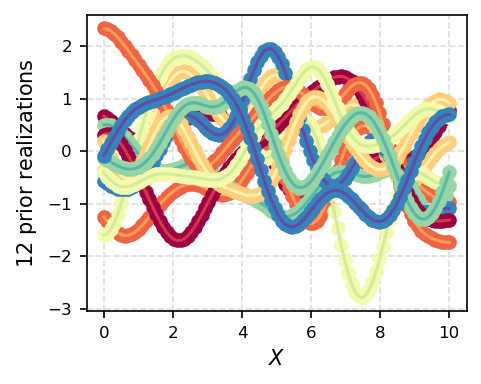

Mean = 0.006, Std = 0.870


In [196]:
plot_prior(Sigma, 12)

In [197]:
X

array([[ 0.        ],
       [ 0.1010101 ],
       [ 0.2020202 ],
       [ 0.3030303 ],
       [ 0.4040404 ],
       [ 0.50505051],
       [ 0.60606061],
       [ 0.70707071],
       [ 0.80808081],
       [ 0.90909091],
       [ 1.01010101],
       [ 1.11111111],
       [ 1.21212121],
       [ 1.31313131],
       [ 1.41414141],
       [ 1.51515152],
       [ 1.61616162],
       [ 1.71717172],
       [ 1.81818182],
       [ 1.91919192],
       [ 2.02020202],
       [ 2.12121212],
       [ 2.22222222],
       [ 2.32323232],
       [ 2.42424242],
       [ 2.52525253],
       [ 2.62626263],
       [ 2.72727273],
       [ 2.82828283],
       [ 2.92929293],
       [ 3.03030303],
       [ 3.13131313],
       [ 3.23232323],
       [ 3.33333333],
       [ 3.43434343],
       [ 3.53535354],
       [ 3.63636364],
       [ 3.73737374],
       [ 3.83838384],
       [ 3.93939394],
       [ 4.04040404],
       [ 4.14141414],
       [ 4.24242424],
       [ 4.34343434],
       [ 4.44444444],
       [ 4

In [203]:
kern = 1.0 * k.RBF(3.0)

In [172]:
kern = k.ConstantKernel(1.0)

In [168]:
kern = k.DotProduct(1.0)

In [204]:
kern(X)

array([[1.        , 0.98472846, 0.94029897, 0.87065963, 0.78174271,
        0.68063182, 0.57463707, 0.47044408, 0.37346969, 0.28749857,
        0.21460953, 0.15534429, 0.10903717, 0.07421416, 0.04898149,
        0.03134803, 0.01945456, 0.01170754, 0.00683192, 0.00386592],
       [0.98472846, 1.        , 0.98472846, 0.94029897, 0.87065963,
        0.78174271, 0.68063182, 0.57463707, 0.47044408, 0.37346969,
        0.28749857, 0.21460953, 0.15534429, 0.10903717, 0.07421416,
        0.04898149, 0.03134803, 0.01945456, 0.01170754, 0.00683192],
       [0.94029897, 0.98472846, 1.        , 0.98472846, 0.94029897,
        0.87065963, 0.78174271, 0.68063182, 0.57463707, 0.47044408,
        0.37346969, 0.28749857, 0.21460953, 0.15534429, 0.10903717,
        0.07421416, 0.04898149, 0.03134803, 0.01945456, 0.01170754],
       [0.87065963, 0.94029897, 0.98472846, 1.        , 0.98472846,
        0.94029897, 0.87065963, 0.78174271, 0.68063182, 0.57463707,
        0.47044408, 0.37346969, 0.28749857, 0

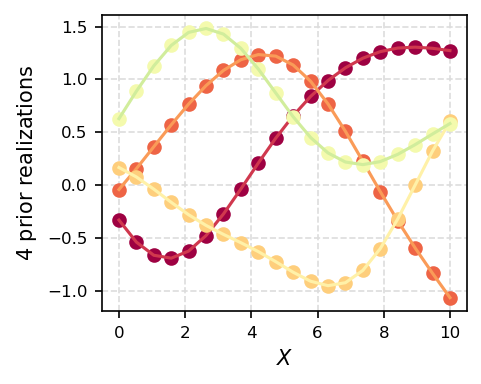

Mean = 0.304, Std = 0.736


In [205]:
plot_prior(kern(X), 4)

[[1.  0.9]
 [0.9 1. ]]


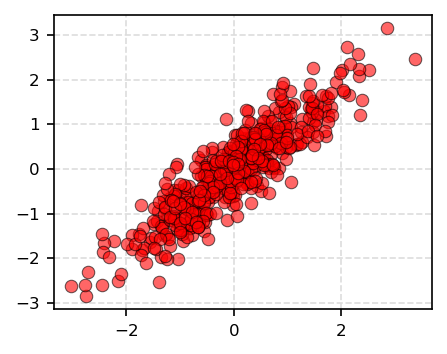

In [176]:
# Sample from:
d = 2 # Number of dimensions
mean = np.matrix([[0.], [0.]])

covariance = np.matrix([
    [1, 0.9], 
    [0.9, 1]
])

# covariance = kern(X)
print(covariance)
# Create L
L = np.linalg.cholesky(covariance)

# Sample X from standard normal
m = 500  # Samples to draw
x = np.random.normal(size=(d, m))
# Apply the transformation
Y = L.dot(x) + mean

plt.plot(Y[0,:], Y[1,:], 'ro', alpha=.6, markeredgecolor='k', markeredgewidth=0.5)
plt.show()

### Note: the amplitude factor also changes the standard deviation

# Test of priors with different Kernels

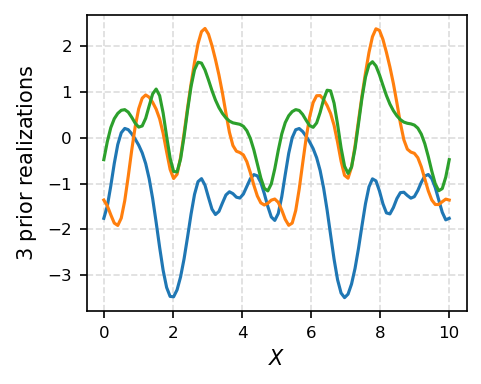

Mean = -0.368, Std = 1.210


In [173]:
kern = 1.0 * k.ExpSineSquared(length_scale=0.5, periodicity=5.0)
plot_prior(kern(X), 3)

### Note, periodicity = 5 denotes, the function starts to repeat itself only after a distance of 5

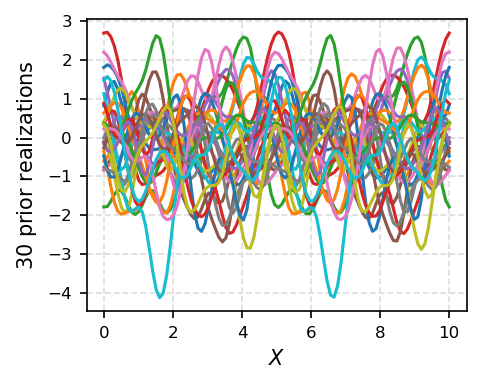

Mean = -0.129, Std = 0.983


In [174]:
plot_prior(kern(X), 30)

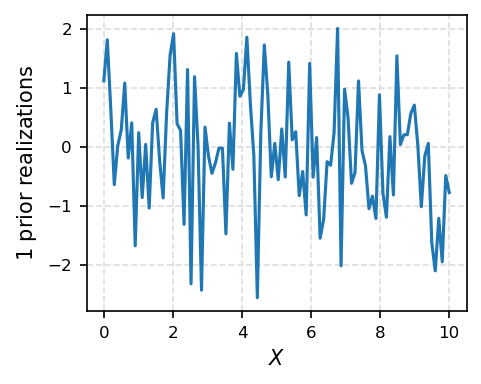

Mean = -0.069, Std = 1.021


In [178]:
kern = 1.0 * k.WhiteKernel(noise_level=1.0)
plot_prior(kern(X), 1)

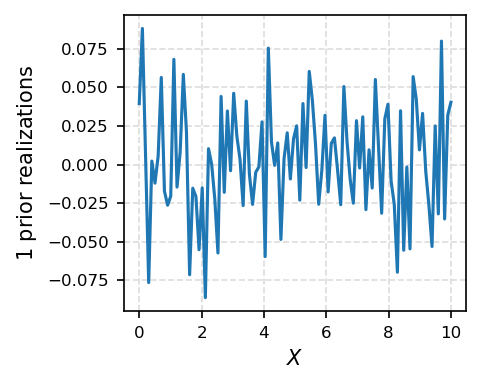

Mean = 0.003, Std = 0.036


In [184]:
kern = 1.0 * k.WhiteKernel(noise_level=0.001)
plot_prior(kern(X), 1)

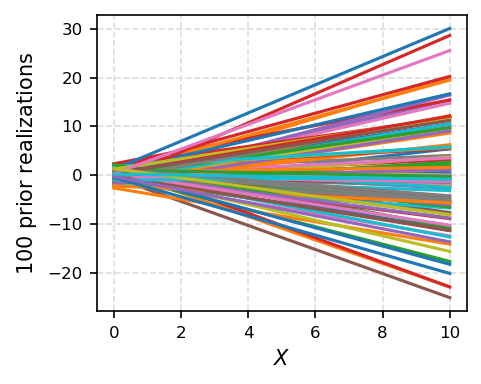

Mean = 0.380, Std = 6.382


In [188]:
kern = 1.0 * k.DotProduct(1.0)
plot_prior(kern(X), 100)

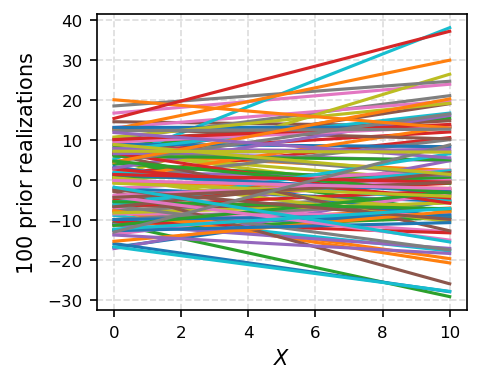

Mean = 0.337, Std = 10.876


In [190]:
kern = 1.0 * k.DotProduct(10)
plot_prior(kern(X), 100)

### Note: dot product is the linear kernel

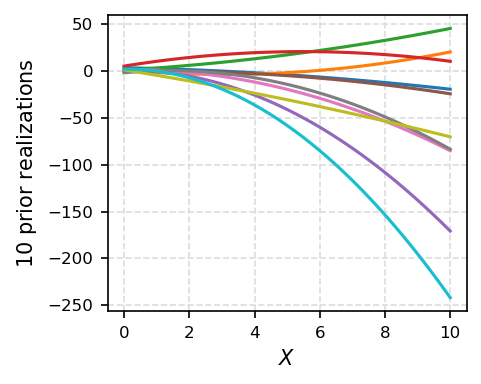

Mean = -19.645, Std = 43.393


In [192]:
kern = 1.0 * k.DotProduct(1.0) * k.DotProduct(2.0)
plot_prior(kern(X), 10)

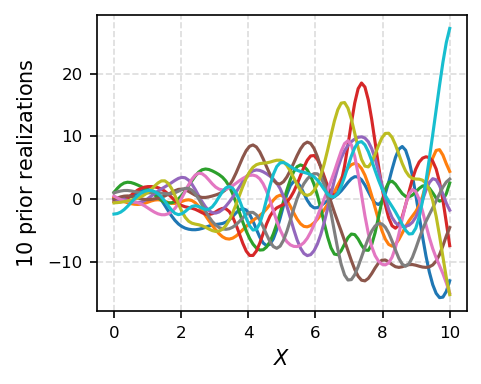

Mean = -0.239, Std = 5.326


In [200]:
kern = 1.0 * k.DotProduct(1.0) * k.RBF(length_scale=0.5)
plot_prior(kern(X), 10)

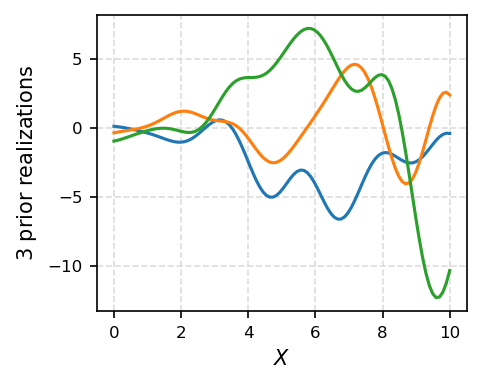

Mean = -0.288, Std = 3.523


In [202]:
kern = 1.0 * k.DotProduct(0.5) * k.RBF(length_scale=1)
plot_prior(kern(X), 3)

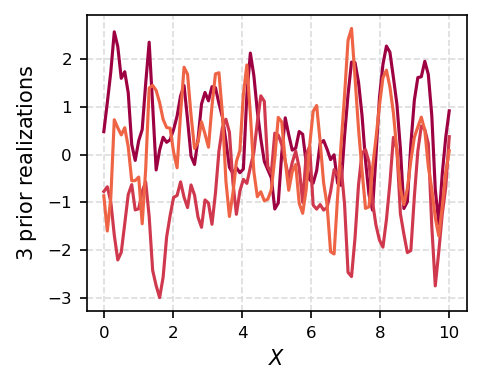

Mean = -0.046, Std = 1.103


In [229]:
kern = 1.0 * k.ExpSineSquared(length_scale=1.0, periodicity=1.0) * k.RBF(1.0)
plot_prior(kern(X), 3)

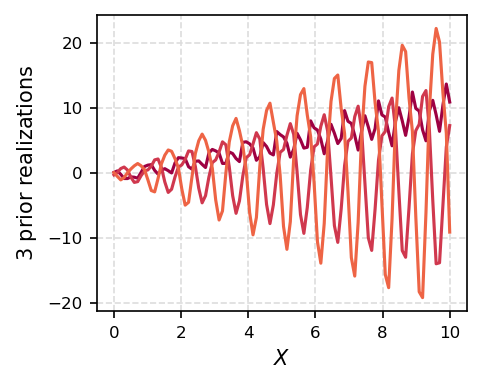

Mean = 2.338, Std = 6.715


In [230]:
kern = 1.0 * k.ExpSineSquared(length_scale=1.0, periodicity=1.0) * k.DotProduct(0.5)
plot_prior(kern(X), 3)

# 2D Data Plotting with a small dataset (see Duvenaud PhD thesis, Fig. 2.6, pg. 16)

In [2]:
n = 16

In [7]:
x1 = np.linspace(-6, 6, n)
x2 = np.linspace(-6, 6, n)

In [8]:
np.random.shuffle(x2)

In [9]:
x1 = x1.reshape(-1, 1)
x2 = x2.reshape(-1, 1)

In [10]:
X = np.concatenate((x1, x2), axis=1)
y = np.sin(x1) + np.sin(x2)

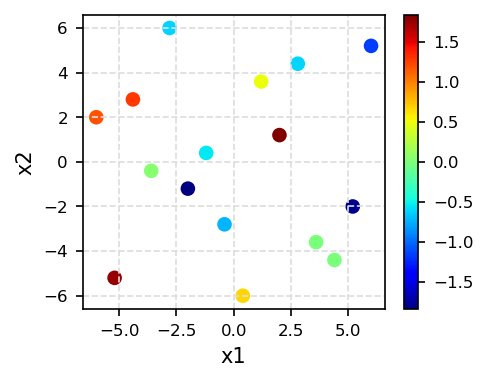

In [11]:
plt.scatter(x1, x2, c=y, cmap="jet")
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

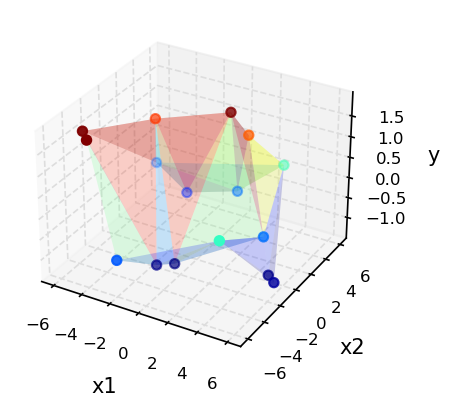

In [553]:
ax = plt.axes(projection='3d')
ax.view_init(30, 300)
ax.plot_trisurf(x1.flatten(), x2.flatten(), y.flatten(), cmap="jet", alpha=0.2)
ax.scatter(x1, x2, y, c=y, cmap="jet")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.tight_layout()
plt.show()

### Note: using 3d scatter and trisurf can tell about the data distribution

In [472]:
xx1, xx2 = np.meshgrid(x1, np.sort(x2, axis=0))

In [473]:
yy = np.sin(xx1) + np.sin(xx2)

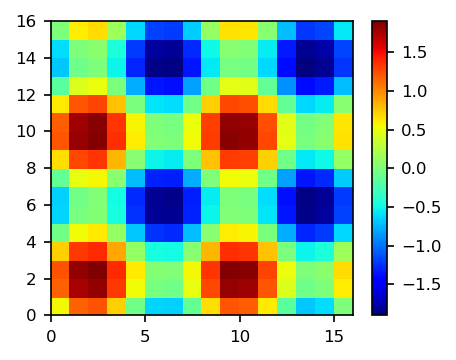

In [474]:
plt.pcolor(yy, cmap="jet")
plt.colorbar()

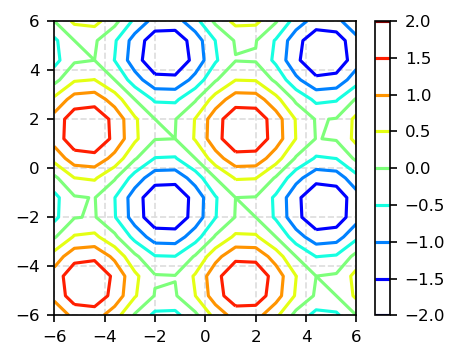

In [475]:
plt.contour(xx1, xx2, yy, cmap="jet")
plt.colorbar()
plt.show()

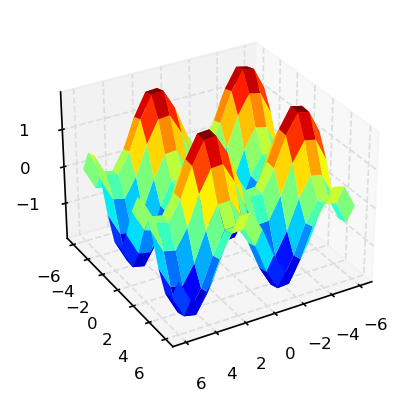

In [476]:
ax = plt.axes(projection='3d')
ax.view_init(30, 60)
ax.plot_surface(xx1, xx2, yy, cmap='jet')
plt.tight_layout()
plt.show()

# Evaluation of kernels on this test dataset

In [12]:
kern = 1.0 * k.RBF(1.0)

In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [14]:
gpr = GaussianProcessRegressor(kernel=kern)

In [15]:
gpr.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [16]:
gpr.kernel_.get_params()

{'k1': 1.15**2,
 'k2': RBF(length_scale=1.77),
 'k1__constant_value': 1.3191471550972753,
 'k1__constant_value_bounds': (1e-05, 100000.0),
 'k2__length_scale': 1.7685187806487133,
 'k2__length_scale_bounds': (1e-05, 100000.0)}

### Using a mesh grid for prediction needs to use dstack(), otherwise elementwise pairing will not occur

In [491]:
xx = np.dstack([xx1, xx2]).reshape(-1, X.shape[1])

In [639]:
yp, std = gpr.predict(xx, return_std=True)

In [642]:
yp = yp.reshape(-1, X.shape[0])

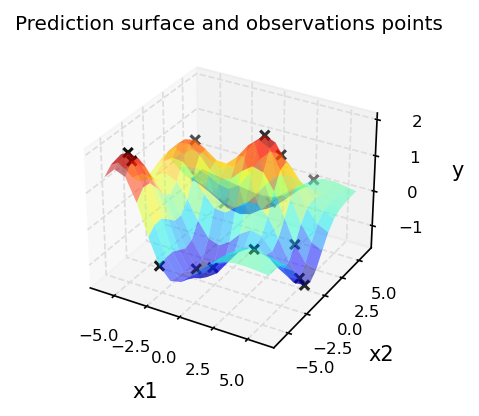

In [552]:
ax = plt.axes(projection='3d')
ax.view_init(30, 300)         # comparison with contour plot is easier if the y axis stays on the right side
ax.plot_surface(xx1, xx2, yp, cmap='jet', alpha=0.5)
ax.scatter(x1, x2, y, c='k', marker="x")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.title("Prediction surface and observations points")
plt.tight_layout()
plt.show()

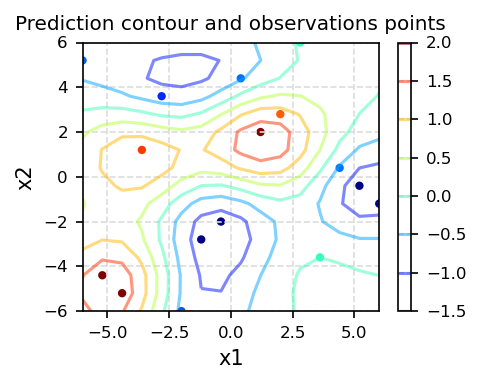

In [619]:
plt.contour(xx1, xx2, yp, cmap='jet', alpha=0.5)
plt.colorbar()
plt.scatter(x1, x2, c=y, marker='.', cmap='jet')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Prediction contour and observations points")
plt.tight_layout()
plt.show()

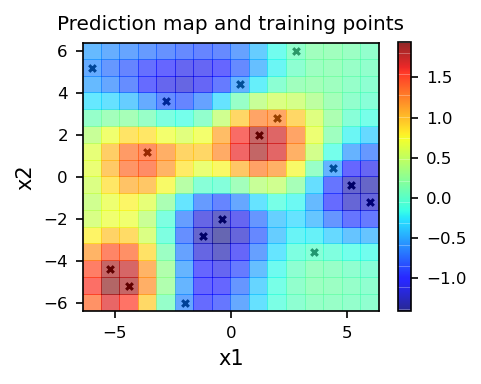

In [620]:
plt.scatter(x1, x2, c='k', marker='x', s=10)
plt.pcolor(xx1, xx2, yp, alpha=0.6, cmap="jet", shading="auto")
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Prediction map and training points")
plt.tight_layout()
plt.show()

### We see that 3 out of 4 peaks have been already identified (red regions)

In [643]:
std = std.reshape(-1, X.shape[0])

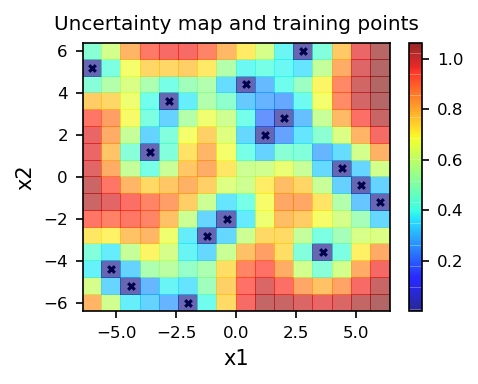

In [644]:
plt.scatter(x1, x2, c='k', marker='x', s=10)
plt.pcolor(xx1, xx2, std, alpha=0.6, cmap="jet", shading="auto")
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Uncertainty map and training points")
plt.tight_layout()
plt.show()

## Fitted LML

In [645]:
gpr.log_marginal_likelihood_value_

-20.284734397447842

In [651]:
# optimized kernel
gpr.kernel_

1.08**2 * RBF(length_scale=1.81)

In [653]:
# theta are typically the log-transformed values of the kernel's hyperparameters
gpr.kernel_.theta

array([0.15463937, 0.59216699])

In [650]:
# original kernel
gpr.kernel

1**2 * RBF(length_scale=1)

In [652]:
gpr.kernel_.get_params()

{'k1': 1.08**2,
 'k2': RBF(length_scale=1.81),
 'k1__constant_value': 1.1672369439806887,
 'k1__constant_value_bounds': (1e-05, 100000.0),
 'k2__length_scale': 1.8079018751081066,
 'k2__length_scale_bounds': (1e-05, 100000.0)}

In [654]:
np.exp(gpr.kernel_.theta)

array([1.16723694, 1.80790188])

In [944]:
# theta = log(params)
gpr.kernel_.theta

array([0.15463937, 0.59216699])

In [943]:
# params = exp(thetas)
np.exp(gpr.kernel_.theta)

array([1.16723694, 1.80790188])

In [911]:
gpr.log_marginal_likelihood(gpr.kernel_.theta)

-20.284734397447842

# LML Landscape

### Grid search over the theta space

In [1052]:
t1 = np.logspace(-5, 0, 50)
t2 = np.logspace(-5, 0, 50)

In [1053]:
np.min(t1)

1e-05

In [1054]:
# create grid
tt1, tt2 = np.meshgrid(t1, t2)

In [1055]:
# calculate LML, this takes time
lml = [[ gpr.log_marginal_likelihood( [tt1[i, j], tt2[i, j]] )
            for i in range(tt1.shape[0]) ]
        for j in range(tt2.shape[1]) ]

In [1056]:
lml = np.array(lml).T

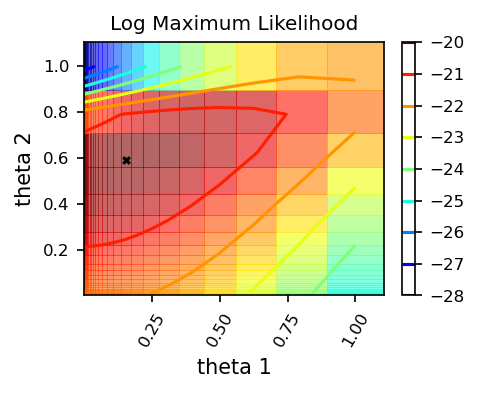

In [1057]:
plt.pcolor(tt1, tt2, lml, alpha=0.6, cmap="jet")
plt.contour(tt1, tt2, lml, alpha=1.0, cmap="jet")
plt.colorbar()
plt.scatter(gpr.kernel_.theta[0], gpr.kernel_.theta[1], c='k', marker='x', s=10)
# plt.xscale("log")
plt.xlabel("theta 1")
plt.ylabel("theta 2")
plt.xticks(rotation=60)
plt.title("Log Maximum Likelihood")
plt.tight_layout()
plt.show()

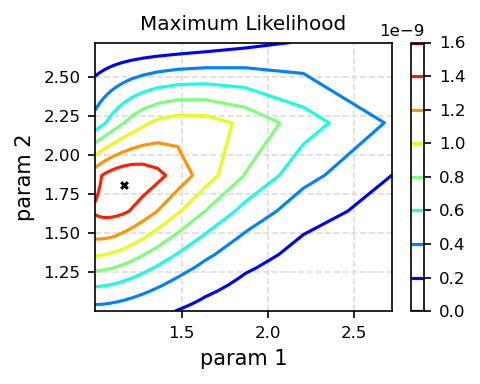

In [1048]:
# plt.pcolor(np.exp(tt1), np.exp(tt2), np.exp(lml), alpha=0.5, cmap="jet")
plt.contour(np.exp(tt1), np.exp(tt2), np.exp(lml), alpha=1.0, cmap="jet")
plt.colorbar()
plt.scatter(np.exp(gpr.kernel_.theta[0]), np.exp(gpr.kernel_.theta[1]), c='k', marker='x', s=10)
plt.xlabel("param 1")
plt.ylabel("param 2")
plt.title("Maximum Likelihood")
plt.tight_layout()
plt.show()

# Higher Dimension - introduce the White kernel

In [1059]:
kern = 1.0 * k.RBF(1.0) + k.WhiteKernel(noise_level=0.01)

In [1060]:
gpr = GaussianProcessRegressor(kernel=kern)

In [1061]:
gpr.fit(X, y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=0.01))

In [1062]:
gpr.kernel_

1.08**2 * RBF(length_scale=1.81) + WhiteKernel(noise_level=1e-05)

In [1063]:
gpr.kernel_.theta

array([  0.15465789,   0.59217468, -11.51292546])

In [1064]:
# global max lml
gpr.log_marginal_likelihood_value_

-20.28485777775135

### Introducing the White kernel does not change the LML (X is already noise free)

# LML Landscape with the white kernel

In [1069]:
# keep the constant kernel theta at the optimum value
t0 = gpr.kernel_.theta[0]

In [1077]:
t1 = np.logspace(-5, 0, 50)
t2 = np.logspace(-15, 0, 50)

In [1093]:
np.min(t2)

1e-15

In [1078]:
# create grid
tt1, tt2 = np.meshgrid(t1, t2)

In [1079]:
# calculate LML, this takes time
lml = [[ gpr.log_marginal_likelihood( [t0, tt1[i, j], tt2[i, j]] )
            for i in range(tt1.shape[0]) ]
        for j in range(tt2.shape[1]) ]

In [1090]:
lml = np.array(lml).T
np.max(lml)

-24.46852280903176

### In this grid, the max lml < global max lml

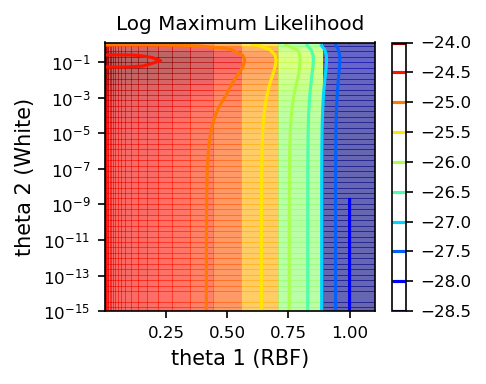

In [1094]:
plt.pcolor(tt1, tt2, lml, alpha=0.6, cmap="jet")
plt.contour(tt1, tt2, lml, alpha=1.0, cmap="jet")
plt.colorbar()
# plt.scatter(gpr.kernel_.theta[1], gpr.kernel_.theta[2], c='k', marker='x', s=10)
plt.yscale("log")
plt.xlabel("theta 1 (RBF)")
plt.ylabel("theta 2 (White)")
# plt.xticks(rotation=60)
plt.title("Log Maximum Likelihood")
plt.tight_layout()
plt.show()

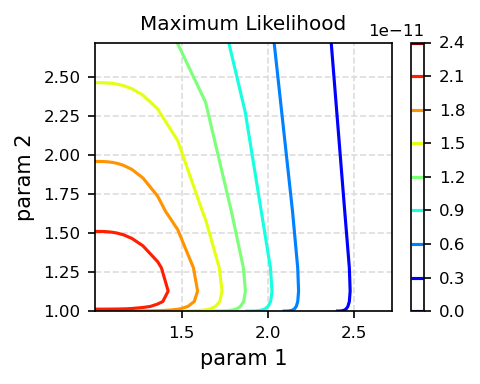

In [1092]:
# plt.pcolor(np.exp(tt1), np.exp(tt2), np.exp(lml), alpha=0.5, cmap="jet")
plt.contour(np.exp(tt1), np.exp(tt2), np.exp(lml), alpha=1.0, cmap="jet")
plt.colorbar()
# plt.scatter(np.exp(gpr.kernel_.theta[1]), np.exp(gpr.kernel_.theta[2]), c='k', marker='x', s=10)
plt.xlabel("param 1")
plt.ylabel("param 2")
plt.title("Maximum Likelihood")
plt.tight_layout()
plt.show()

# Introduce a 2nd rbf kernel as Duvenaud 2014

In [1178]:
kern = k.RBF(1.0) + k.RBF(1.0)

In [1179]:
gpr = GaussianProcessRegressor(kernel=kern)
gpr.fit(X, y)
gpr.kernel_

RBF(length_scale=2.19) + RBF(length_scale=2.19)

In [1180]:
gpr.log_marginal_likelihood_value_

-20.8785192519542

### The LML value gets slightly worse

In [19]:
def _pred_vect(X, xx, i, j):
    xref = np.mean(X, axis=0)
    xref[i] = xx[0]
    xref[j] = xx[1]
    return xref

def plot_prediction(gp, X, y, i=0, j=1, expand=1):
    """ gp: the fitted GPR
        X: the design matrix
        y: the target vector
        i, j: the prediction column numbers of X
        expand: how much to expand the prediction space than the training space
    """
    # prediction space
    n = 50
    x1 = np.linspace(np.min(X[:,i])-expand, np.max(X[:,i])+expand, n)
    x2 = np.linspace(np.min(X[:,j])-expand, np.max(X[:,j])+expand, n)
    xx1, xx2 = np.meshgrid(x1, x2)
    xx = np.dstack([xx1, xx2]).reshape(-1, 2)
    
    # create the X values with the average of the other columns that are not i, j
    xxa = np.array([ _pred_vect(X, x, i, j) for x in xx ])
    
    # predict
    yp, std = gp.predict(xxa, return_std=True)

    # reshape
    yp = yp.reshape(xx1.shape)
    std = std.reshape(xx1.shape)
    
    # heat maps
    plt.scatter(X[:,i], X[:,j], c='k', marker='x', s=10)
    plt.pcolor(xx1, xx2, yp, alpha=0.6, cmap="jet", shading="auto")
    plt.colorbar()
    plt.xlabel("x%d" %i)
    plt.ylabel("x%d" %j)
    plt.title("Prediction map and training points")
    plt.tight_layout()
    plt.show()

    plt.scatter(X[:,i], X[:,j], c='k', marker='x', s=10)
    plt.pcolor(xx1, xx2, std, alpha=0.6, cmap="jet", shading="auto")
    plt.colorbar()
    plt.xlabel("x%d" %i)
    plt.ylabel("x%d" %j)
    plt.title("Uncertainty map and training points")
    plt.tight_layout()
    plt.show()

    # surface plot
    ax = plt.axes(projection='3d')
    ax.view_init(30, 300)         # comparison with contour plot is easier if the y axis stays on the right side
    ax.plot_surface(xx1, xx2, yp, cmap='jet', alpha=0.5)
    ax.scatter(X[:,i], X[:,j], y, c='k', marker='x', s=10)
    plt.xlabel("x%d" %i)
    plt.ylabel("x%d" %j)
    ax.set_zlabel("y")
    plt.title("Prediction surface and training points")
    plt.tight_layout()
    plt.show()
    
    print("Uncertainty avg = %.4f \t total = %.4f" %(np.mean(std), np.sum(std)))

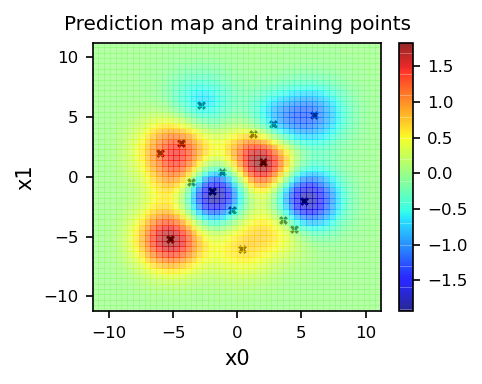

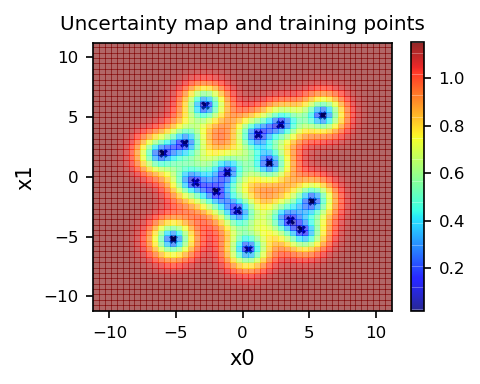

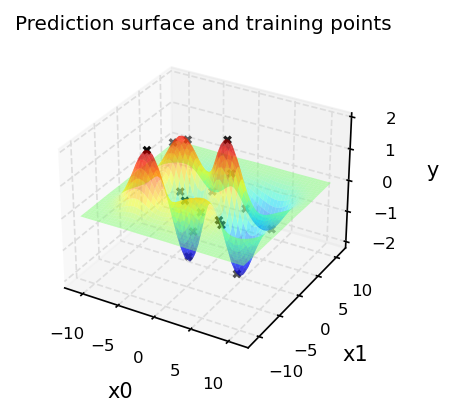

Uncertainty avg = 0.9552 	 total = 2387.9616


In [20]:
plot_prediction(gpr, X, y, expand=5)

### Though not a massive improvement, the uncertainty improves than the previous case where we used only a single rbf.

## The lml landscape

In [1233]:
def _calc_lml(gp, t1, t2, i, j):
    """ Calculate lml by keeping other params at the optimized values"""
    theta = gp.kernel_.theta
    theta[i] = t1
    theta[j] = t2
    return gp.log_marginal_likelihood(theta)

def plot_lml_landscape(gp, i=0, j=1):
    """ gp: the fitted GPR
        i, j: the parameter indices of the kernel
    """
    n = 50
    t1 = np.logspace(-4, 0, n)
    t2 = np.logspace(-4, 0, n)
    
    # create theta grid
    tt1, tt2 = np.meshgrid(t1, t2)

    # calculate LML, this takes time depending on n
    lml = [[ _calc_lml(gp, tt1[p, q], tt2[p, q], i, j)
                for p in range(tt1.shape[0]) ] for q in range(tt2.shape[1]) ]
    
    lml = np.array(lml).T
    print("Max LML = %0.4f" %np.max(lml))
    print("Global max = %0.4f" %gp.log_marginal_likelihood_value_)
    
    # theta as heatmap
    plt.pcolor(tt1, tt2, lml, alpha=0.6, cmap="jet")
    plt.contour(tt1, tt2, lml, alpha=1.0, cmap="jet")
    plt.colorbar()
    plt.scatter(gp.kernel_.theta[i], gp.kernel_.theta[j], c='k', marker='x', s=10)
#     plt.yscale("log")
    plt.xlabel("theta %d" %i)
    plt.ylabel("theta %d" %j)
    # plt.xticks(rotation=60)
    plt.title("Log Maximum Likelihood")
    plt.tight_layout()
    plt.show()

    # params as contour
    plt.contour(np.exp(tt1), np.exp(tt2), np.exp(lml), alpha=1.0, cmap="jet")
    plt.colorbar()
    plt.scatter(np.exp(gp.kernel_.theta[i]), np.exp(gp.kernel_.theta[j]), c='k', marker='x', s=10)
    plt.xlabel("param %d" %i)
    plt.ylabel("param %d" %j)
    plt.title("Maximum Likelihood")
    plt.tight_layout()
    plt.show()


Max LML = -21.1366
Global max = -20.8785


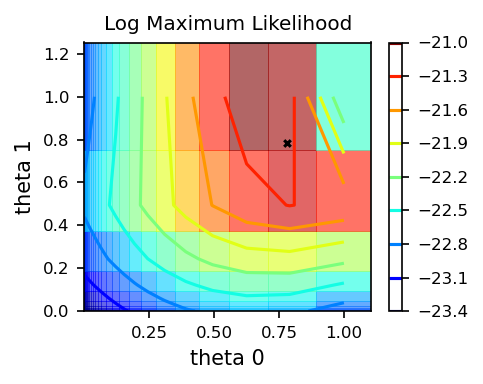

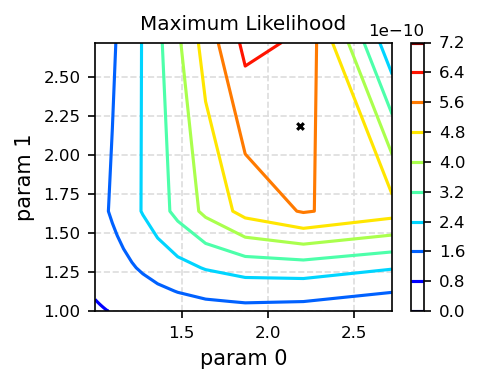

In [1184]:
plot_lml_landscape(gpr)

# Using a multiplicative RBF kernel

In [1185]:
kern = k.RBF(length_scale=1.0) * k.RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kern)
gpr.fit(X, y)
gpr.kernel_

RBF(length_scale=2.42) * RBF(length_scale=2.42)

### Note, the length scale increases than the additive kernel

In [1186]:
gpr.log_marginal_likelihood_value_

-20.352131826208712

### But the lml improves!! :/

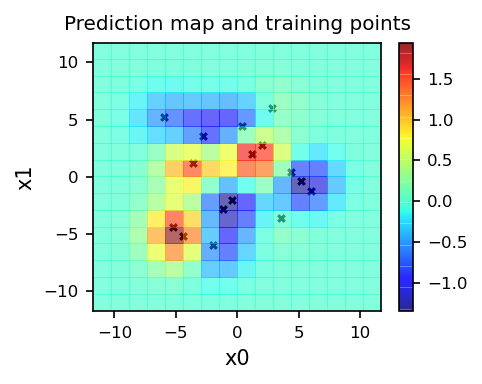

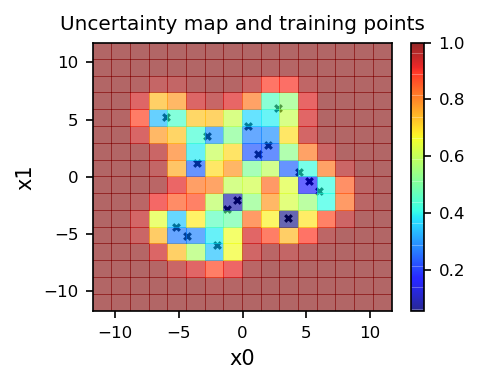

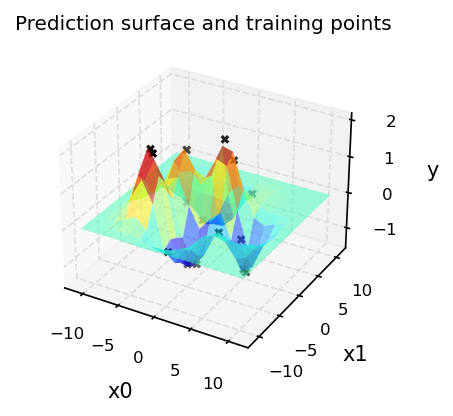

Uncertainty avg = 0.8617 	 total = 220.6014


In [1188]:
plot_prediction(gpr, X, y, expand=5)

### Even the uncertainty improves!

Max LML = -20.3521
Global max = -20.3521


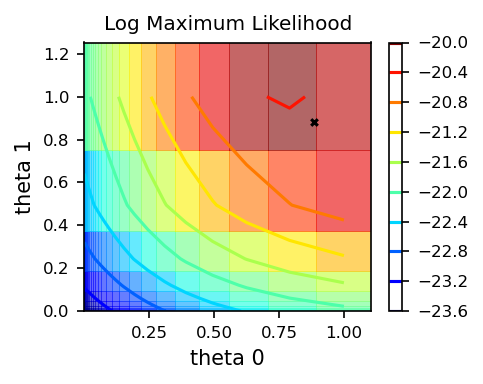

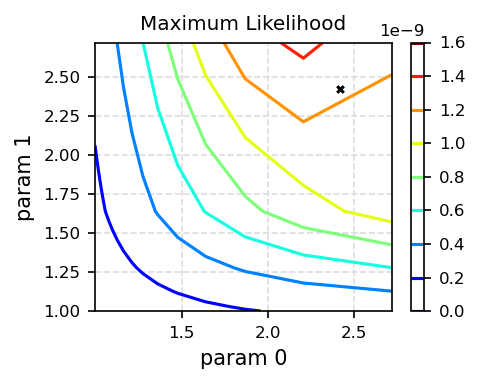

In [1174]:
plot_lml_landscape(gpr)

### I can't see the improvement by the additive SE kernel over the multiplicative SE kernel with only 16 training points. :( 

# Increase the number of training points

In [1190]:
n = 50

In [1191]:
x1 = np.linspace(-6, 6, n)
x2 = np.linspace(-6, 6, n)

In [1192]:
np.random.shuffle(x2)

In [1193]:
x1 = x1.reshape(-1, 1)
x2 = x2.reshape(-1, 1)

In [1194]:
X = np.concatenate((x1, x2), axis=1)
y = np.sin(x1) + np.sin(x2)

In [1195]:
def plot_training_points(X, y, i=0, j=1):
    plt.scatter(X[:,i], X[:,j], c=y, cmap="jet")
    plt.colorbar()
    plt.xlabel("x%d" %i)
    plt.ylabel("x%d" %j)
    plt.show()

    ax = plt.axes(projection='3d')
    ax.view_init(30, 300)
    ax.plot_trisurf(X[:,i].flatten(), X[:,j].flatten(), y.flatten(), cmap="jet", alpha=0.2)
    ax.scatter(X[:,i], X[:,j], y, c=y, cmap="jet")
    plt.xlabel("x%d" %i)
    plt.ylabel("x%d" %j)
    ax.set_zlabel("y")
    plt.tight_layout()
    plt.show()

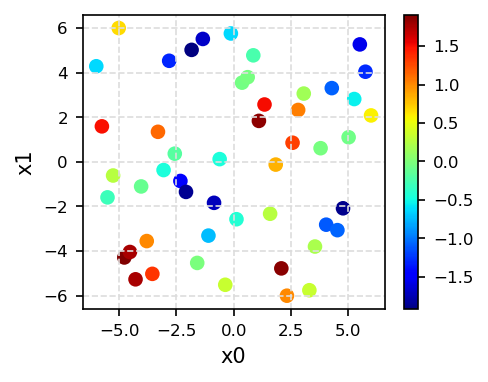

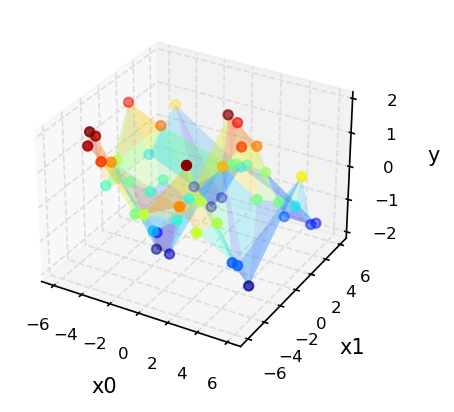

In [1196]:
plot_training_points(X, y)

## Repeat with additive kernel

In [1198]:
kern = k.RBF(1.0) + k.RBF(1.0)
gpr = GaussianProcessRegressor(kernel=kern)
gpr.fit(X, y)
gpr.kernel_

RBF(length_scale=2.38) + RBF(length_scale=2.38)

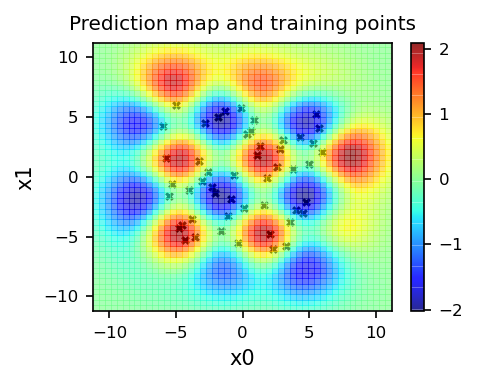

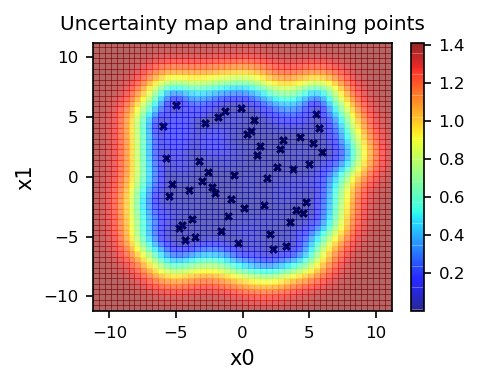

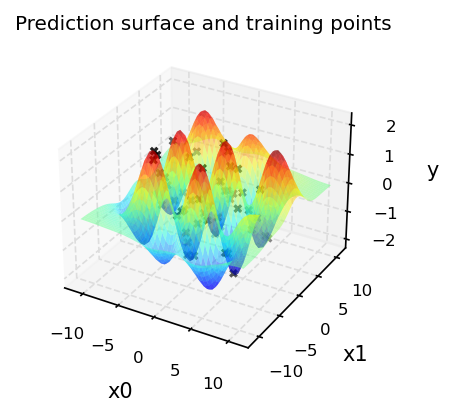

Uncertainty avg = 0.7627 	 total = 1906.7983


In [1200]:
plot_prediction(gpr, X, y, expand=5)

## Repeat with multiplicative kernel

In [1202]:
kern = k.RBF(1.0) * k.RBF(1.0)
gpr = GaussianProcessRegressor(kernel=kern)
gpr.fit(X, y)
gpr.kernel_

RBF(length_scale=2.9) * RBF(length_scale=2.9)

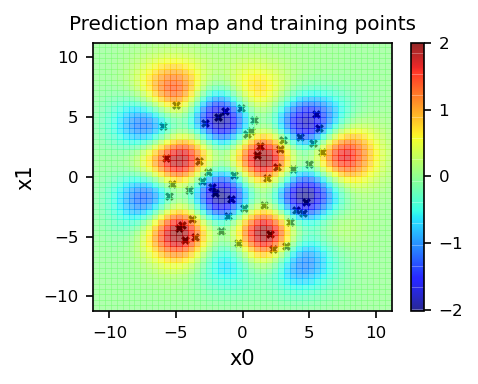

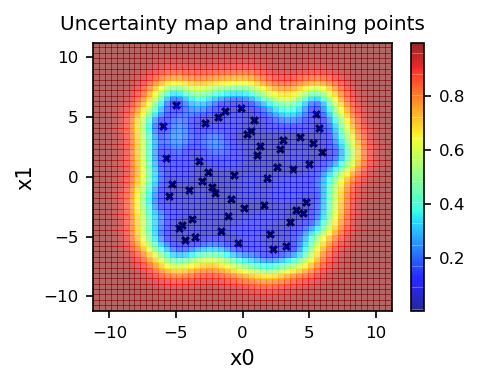

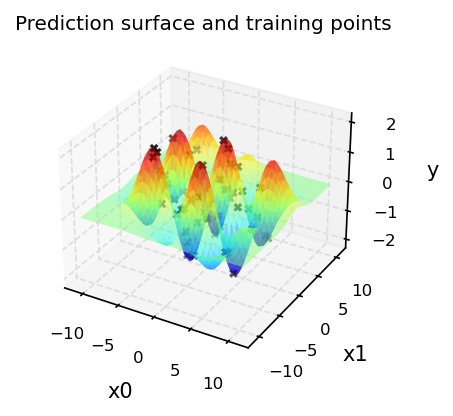

Uncertainty avg = 0.6093 	 total = 1523.1726


In [1203]:
plot_prediction(gpr, X, y, expand=5)

### Well, looks like its not fully true that multiplicative kernel is worse as claimed in the thesis by Duvenaud!

## Increased prediction region a lot

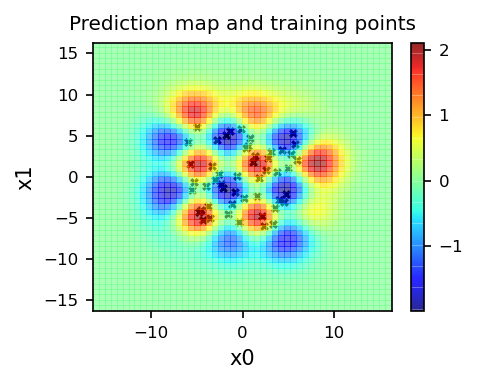

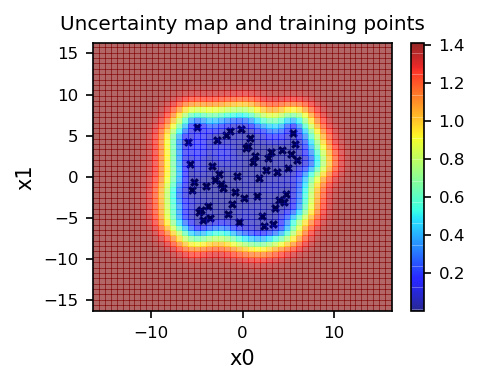

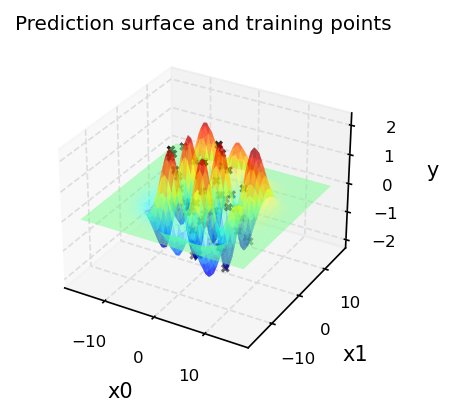

Uncertainty avg = 1.1058 	 total = 2764.6134


-17.419834192406693

In [1208]:
kern = k.RBF(1.0) + k.RBF(1.0)
gpr = GaussianProcessRegressor(kernel=kern)
gpr.fit(X, y)
plot_prediction(gpr, X, y, expand=10)
gpr.log_marginal_likelihood_value_

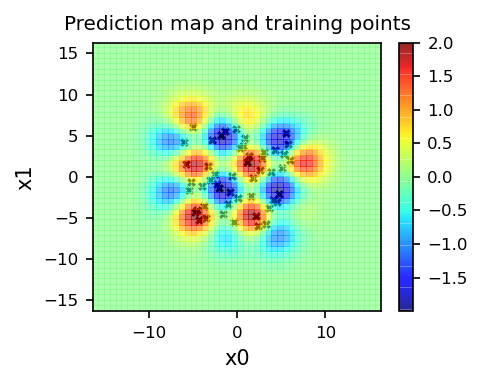

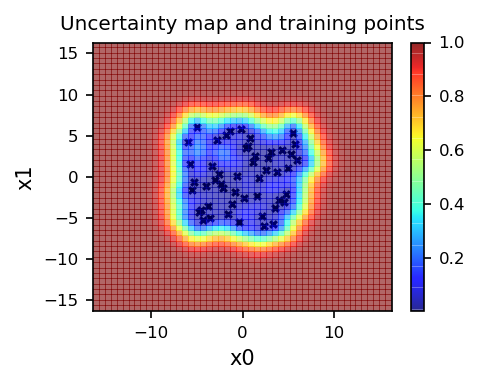

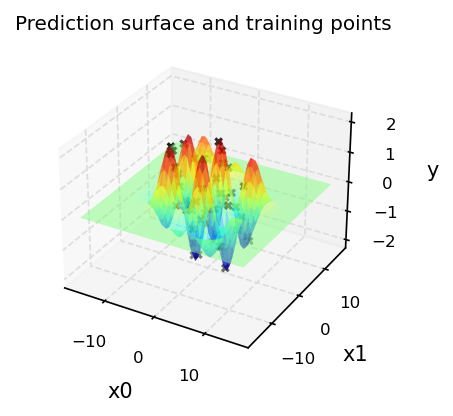

Uncertainty avg = 0.8153 	 total = 2038.2528


-22.473676494559506

In [1209]:
kern = k.RBF(1.0) * k.RBF(1.0)
gpr = GaussianProcessRegressor(kernel=kern)
gpr.fit(X, y)
plot_prediction(gpr, X, y, expand=10)
gpr.log_marginal_likelihood_value_

### Okay, now I see, the LML value is better with the additive kernel, and the prediction map is slightly better.

### So, we need to focus on the LML value, not the uncertainty when choosing kernel. 

In [1212]:
kern = k.RBF(1.0) + k.RBF(1.0)
gpr = GaussianProcessRegressor(kernel=kern)
gpr.fit(X, y)
gpr.log_marginal_likelihood_value_

-17.419834192406693

In [1213]:
kern = k.RBF(1.0) * k.RBF(1.0)
gpr = GaussianProcessRegressor(kernel=kern)
gpr.fit(X, y)
gpr.log_marginal_likelihood_value_

-22.473676494559506

In [1214]:
kern = k.RBF(1.0)
gpr = GaussianProcessRegressor(kernel=kern)
gpr.fit(X, y)
gpr.log_marginal_likelihood_value_

-22.473676494559093

In [1215]:
kern = 1.0 * k.RBF(1.0) + 1.0 * k.RBF(1.0)
gpr = GaussianProcessRegressor(kernel=kern)
gpr.fit(X, y)
gpr.log_marginal_likelihood_value_

-11.873762205399707

### A massive LML improvement if we also add two const kernels on the additive one

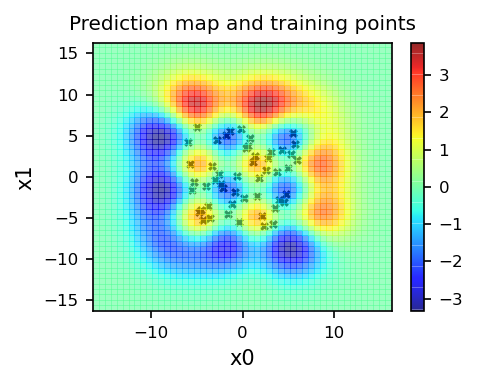

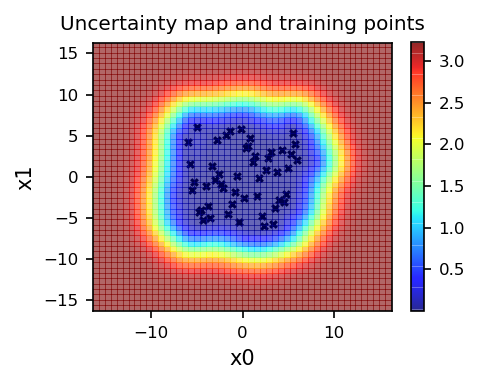

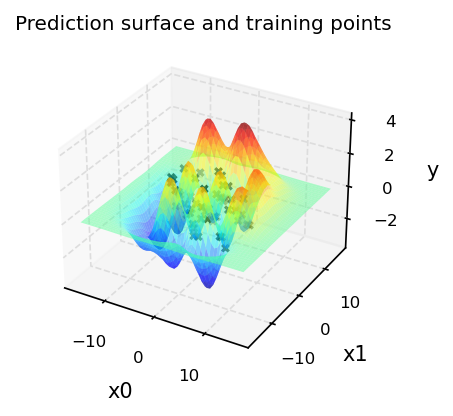

Uncertainty avg = 2.2592 	 total = 5648.0789


In [1216]:
plot_prediction(gpr, X, y, expand=10)

### Now prediction is possible even when x1 > 10 region. Though uncertainty is high.

In [1244]:
kern = 1.0 * k.RBF(1.0) + 1.0 * k.RBF(1.0) + k.WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kern)
gpr.fit(X, y)
gpr.log_marginal_likelihood_value_

-12.766306652539235

In [1240]:
kern = 1.0 * k.RBF(1.0) + 1.0 * k.RBF(1.0) + k.RBF(1.0)
gpr = GaussianProcessRegressor(kernel=kern)
gpr.fit(X, y)
gpr.log_marginal_likelihood_value_

-11.873762205186203

### The improvement saturates or worsens with additional additive terms

### But, with a small number of data points the improvements are not obvious